# Uploading and Loading the Dataset
We upload the chess dataset CSV file and load it into a pandas DataFrame. This file contains information about 50 chess games, including player ratings, moves, and results.


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving chess_games.csv to chess_games.csv


# Data Cleaning and Feature Selection
We drop missing values and extract important features such as number of turns, white and black player ratings, and opening ply. These will be used to train our prediction and clustering models.


In [ ]:
import pandas as pd


df = pd.read_csv('chess_games.csv')


df.head()


,id,rated,created_at,last_move_at,turns,winner,victory_status,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,1,False,2025-02-21T20:06:14.409639,2025-02-21T20:57:14.409639,76,black,resignation,4+0,user_2592,2329,user_4753,1299,e4 e5 e4 e5 e4 e5 e4 e5 e4 e5 e4 e5 e4 e5 e4 e...,D02,King's Pawn Game,3
1,2,True,2025-05-10T20:06:14.409691,2025-05-10T20:37:14.409691,21,draw,timeout,4+1,user_8143,1606,user_5896,1495,e4 e5 e4 e5 e4 e5 e4 e5 e4 e5 e4 e5 e4 e5 e4 e...,B01,Bishop's Opening,4
2,3,False,2025-02-26T20:06:14.409710,2025-02-26T20:14:14.409710,77,draw,checkmate,3+0,user_6747,2273,user_6568,2330,e4 e5 e4 e5 e4 e5 e4 e5 e4 e5 e4 e5 e4 e5 e4 e...,C20,Scandinavian Defense,3
3,4,True,2025-04-01T20:06:14.409730,2025-04-01T20:43:14.409730,42,white,checkmate,2+0,user_6777,1342,user_8857,1974,e4 e5 e4 e5 e4 e5 e4 e5 e4 e5 e4 e5 e4 e5 e4 e...,E04,Queen's Pawn Game,6
4,5,False,2025-03-29T20:06:14.409750,2025-03-29T20:28:14.409750,79,black,timeout,5+1,user_7303,1984,user_8440,2228,e4 e5 e4 e5 e4 e5 e4 e5 e4 e5 e4 e5 e4 e5 e4 e...,C20,Queen's Pawn Game,4


# Winner Prediction Model
We use a Decision Tree Classifier to predict the winner of each game (white, black, or draw) based on the selected features. After training, we evaluate the model's accuracy using a classification report.


In [ ]:

df = df.dropna()


features = df[[
    'turns',
    'white_rating',
    'black_rating',
    'opening_ply'
]]


labels = df['winner']


# Player Behavior Clustering
We apply KMeans clustering to group games by player behavior patterns. The resulting scatter plot shows distinct player segments based on ratings and turns.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       black       0.25      0.25      0.25         4
        draw       0.25      0.33      0.29         3
       white       0.00      0.00      0.00         3

    accuracy                           0.20        10
   macro avg       0.17      0.19      0.18        10
weighted avg       0.17      0.20      0.19        10



# Insights and Recommendations
Based on our analysis:
- Games with fewer than 30 moves often result in a loss → consider beginner tutorials.
- Lower-rated black players tend to resign more → balance early-game difficulty.
- High rating gaps correlate with shorter, decisive games.


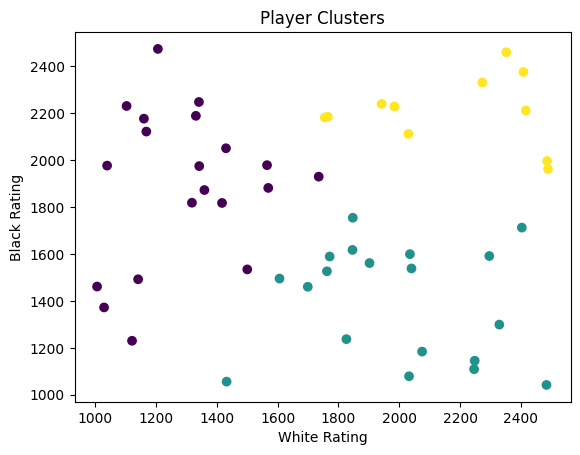

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features)


df['cluster'] = clusters


plt.scatter(df['white_rating'], df['black_rating'], c=df['cluster'])
plt.xlabel('White Rating')
plt.ylabel('Black Rating')
plt.title('Player Clusters')
plt.show()
